# Titanic Survival Analysis using EDA
This project explores the Titanic dataset to understand which factors affected passenger survival.

We'll perform data cleaning, feature engineering, and visualizations to uncover patterns using Python (pandas, seaborn, matplotlib).


In [1]:
pip install pandas seaborn matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Step 1: Load Dataset
We load the Titanic dataset directly from an online source (GitHub).

The dataset contains information about 891 passengers, including demographic details, ticket fare, class, and survival status.


In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Previewing the Data
We take a look at the first few rows to understand the structure and types of data available.


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Step 2: Data Cleaning
We check for and handle missing values in key columns:

- `Age`: Fill with median
- `Embarked`: Fill with mode
- `Cabin`: Dropped due to 77% missing

This ensures the dataset is usable for analysis.


In [63]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'LogFare', 'FamilySize'],
      dtype='object')

In [15]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [20]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [22]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Step 3: Exploratory Data Analysis (EDA)
Now that the data is clean, we explore survival trends using visualizations.


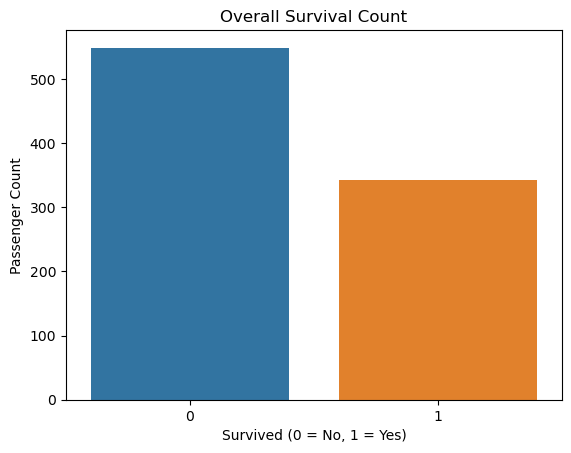

In [24]:
sns.countplot(x='Survived', data=df)
plt.title("Overall Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.show()

### Overall Survival Count
This shows how many passengers survived (1) vs. did not (0).


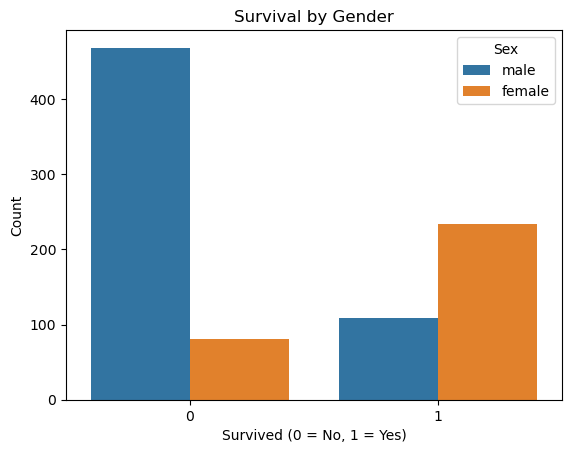

In [26]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

### Survival by Gender
We compare survival rates across male and female passengers.


In [30]:
df['Pclass'] = df['Pclass'].astype(str)


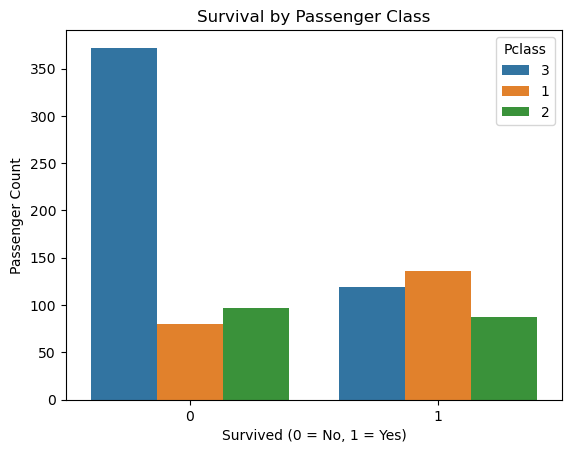

In [32]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.show()

### Survival by Passenger Class
We examine if passenger class affected survival rates.


C:\Users\kulso\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


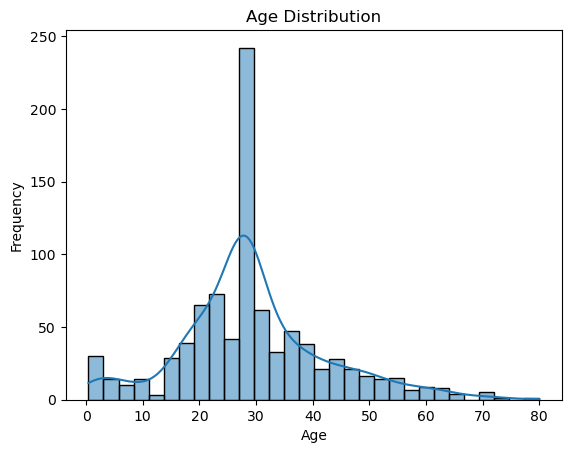

In [34]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Age Distribution
We visualize the age distribution to understand passenger demographics.


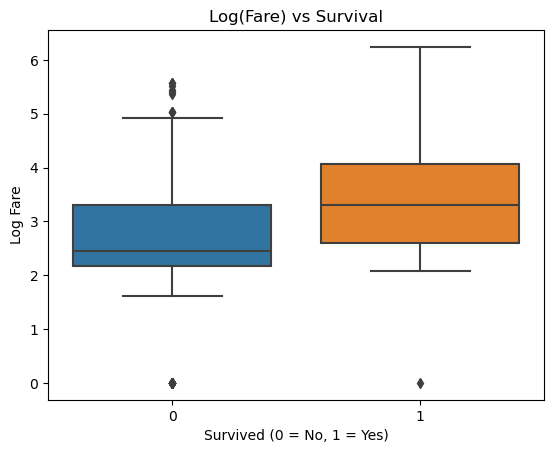

In [38]:
import numpy as np

# Add a new column with log fare
df['LogFare'] = df['Fare'].apply(lambda x: np.log(x + 1))

sns.boxplot(x='Survived', y='LogFare', data=df)
plt.title("Log(Fare) vs Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Log Fare")
plt.show()

### Fare Paid vs Survival
This boxplot shows how fare paid varied across survival status.
Passengers who paid higher fares generally had a higher chance of survival. The median fare among survivors was higher than non-survivors, suggesting class or cabin quality may have influenced survival outcomes.

In [40]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

## Family Size Feature Engineering
The plot below shows survival counts across different family sizes.


In [48]:
df['FamilySize'] = df['FamilySize'].astype(str)


In [54]:
df['Survived'] = df['Survived'].astype(str)


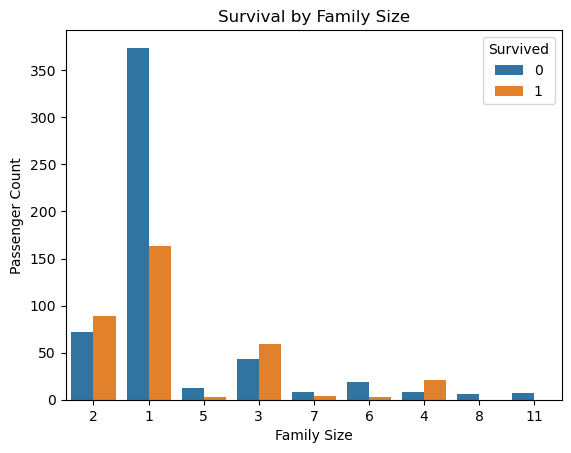

In [56]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Passenger Count")
plt.show()


## Family Size vs Survival

A new column `FamilySize = SibSp + Parch + 1` was created to understand how traveling group size affected survival.

- Solo passengers (FamilySize = 1) had **lower survival** rates.
- Passengers in **small families (2–4 members)** had the **highest survival** rates.
- Large families (5 or more) also saw a drop in survival probability.

This suggests that being in a small group may have provided better chances of accessing help, lifeboats, or staying together.



## Final Summary

- Cleaned missing values in `Age` and `Embarked`, dropped `Cabin` due to too many missing entries.
- Found higher survival rates among **females**, **first-class passengers**, and those who **paid higher fares**.
- Applied a **log transformation** on `Fare` to handle outliers and improve visualization.
- Created a new feature `FamilySize = SibSp + Parch + 1`:
  - **Small families (2–4)** showed the best survival outcomes.
  - **Solo travelers** and **large families (5+)** had lower chances of survival.
- Overall, survival was influenced by a mix of **demographics, ticket class, and group size**.

This project demonstrates how basic EDA and feature engineering can uncover meaningful patterns in real-world data.
